In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

**Motivacion y audencia**

La motivacion del dataset es el gusto por el cine y las peliculas que, con el paso de los años, fueron consiguiendo cada vez mas prestigio hasta convertirse en peliculas clasicas de la historia del cine.

La audiencia a la que esta destinado este proyecto es para los cinefilos, que les interesen los clasicos del cine y busquen las mejores opciones entre 1980 y 2020. Tambien puede ser de interes para las productoras que busquen los mejores actores, actores y/o escritores, ya que tambien se realiza un analisis de los equipos de trabajo.

**Storytelling**

La motivacion del dataset es el gusto por el cine y las peliculas que, con el paso de los años, fueron consiguiendo cada vez mas prestigio hasta convertirse en peliculas clasicas de la historia del cine.

La audiencia a la que esta destinado este proyecto es para los cinefilos, que les interesen los clasicos del cine y busquen las mejores opciones entre 1980 y 2020. Tambien puede ser de interes para las productoras que busquen los mejores actores, actores y/o escritores, ya que tambien se realiza un analisis de los equipos de trabajo.

Comenzando por los años '80, con la llegada del VHS y los blockbusters, el presupuesto de las producciones comenzaron a invertir grandes presupusetos. El gasto en publicidad comenzó a ser altísimo y se creó todo tipo de merchandising. Un concepto que tambien se implementó mucho a partir de esta decada fue la saga, teniendo como principal exponenete a 'Back to the future'(1985) o 'Indiana Jones'(1981). Otro concepto que triunfó fue el 'slasher' con personajes como Freddy Krueger, aunque si de terror hablamos se debe mencionar a escritores como Stephen King que inspiró 'The Shining'(1980). Durante esta época también se ensalzaron los valores patrios americanos, motivada por la existencia de la Guerra Fría y las tensiones entre Estados Unidos y la Unión Soviética, marcadas fuertemente en 'Rocky IV'(1985) y 'Rambo II'(1985).Sin duda, el cine de acción fue uno de los puntos fuertes de esta época. El guión pasaba a un segundo plano. Se priorizaba el cast de la película y las escenas de acción. Durante esta época surgieron un gran número de actores. Mel Gibson, Bruce Willis y Eddie Murphy, algunos ejemplos. Y grandes directores también triunfaron en esta época, como Brian de Palma, Ridley Scott, James Cameron, aunque los que mas destacaron fueron Steven Spielberg y George Lucas.

Los años 90 son una época marcada por los DVD's y por pasar tardes enteras en los ya extinguidos videoclubs. Steven Spielberg no paraba de producir obras que hoy podemos llamar clásicos. Y Quentin Tarantino se preparaba sus primeros masterpieces. Durante esta época los artistas que consolidaron el Nuevo Hollywood, Spielberg, junto a Martin Scorsese, Francis Ford Coppola, Steven Spielberg, George Lucas, Dennis Hopper, Paul Thomas Anderson, entre otros. Los grandes estudios descubrieron la rentabilidad de la película más allá de la proyección en las salas. Los efectos especiales acabaron convirtiéndose en un sello distintivo de la ciencia ficción y el thriller de acción. Así, también se trasladaron las historias de los videojuegos, con la misma intención comercial. Varias peliculas marcaron esta epoca: Goodfellas(1990), 'Reservoir Dogs' (1992), influenciados por el contexto sociopolítico y cultural. Poco después, se realiza el primer largometraje de animación digital. Una filial de Disney, Pixar Animation Studios, produce 'Toy Story' (1995), convirtiéndo a la película en todo un hito para la historia del cine de animación.

Para empezar, los 2000 plantearon el comienzo de grandes franquicias: en el 2001, quien abrió esa puerta fue Peter Jackson, con la primera entrega de la trilogía de The Lord of the Rings, The Fellowship of the Ring. El éxito fue tal que la película, en el momento de su estreno, se convirtió en el quinto filme de mayor recaudación en la historia. También por el 2001 se inició la franquicia de Harry Potter, basada en las novelas de J. K. Rowling. Antes del final de la decada tambien dio el puntapié inicial al Universo Cinematográfico de Marvel tal y como lo conocemos, generando un boom y un fandom pocas veces visto en el pasado. Los avances tecnologicos, tambien dieron como resultado la creacion del consumo por streaming, con la aparicion de Netflix.

Y a Netflix se unieron otros como HBO, Amazon Prime… Y, en 2020, Disney+. La democratización de este tipo de servicios ha sacudido a la industria del cine en la década de 2010. El exito de las series y las plataformas de streaming parecen poner a las salas de cine en peligro de extinción. Sin embargo, Netflix y Amazon han estado detrás de algunas de las mejores películas de la década. Algunos ejemplos son 'Roma' de Alfonso Cuarón, 'The Irishman' de Martin Scorsese, protagonizada por grandes figuras de la historia del cine como Robert de Niro, Al Pacino y Joe Pesci. Tambien se podria decir que fue la epoca dorada de Disney, con el reestreno de clasicos en formato live-actions, remakes y las franquicias de Star Wars y Marvel.


**Preguntas/Hipotesis**

Las preguntas que quisiera responder en este proyecto son:

1. ¿Quienes son los directores que mas peliculas dirigieron? ¿Son los mejores o mas reconocidos realmente?

2. ¿Como fue el desempeño de las peliculas de los 3 directores que mas peliculas dirigieron?

3. ¿Cual es el genero mejor valorado de los mejores actores?

4. ¿Cual fue el mejor año del cine? ¿Evoluciono favorablemente el cine?


In [8]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

df = pd.read_csv('movies.csv', sep=',')

indexDir = df[df['director'] == 'Directors'].index
df.drop(indexDir, inplace=True)

df['score'].fillna(df['score'].mean(), inplace=True)
df['votes'].fillna(df['votes'].mean(), inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['gross'].fillna(df['gross'].mean(), inplace=True)
df['star'].fillna('Tom Logan', inplace=True)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


# Analisis Exploratorio de los Datos

### 1. ¿Quienes son los directores que mas peliculas dirigieron? ¿Son los mejores o mas reconocidos realmente?

director
Woody Allen         38
Clint Eastwood      31
Steven Spielberg    27
Ron Howard          24
Ridley Scott        23
Name: name, dtype: int64

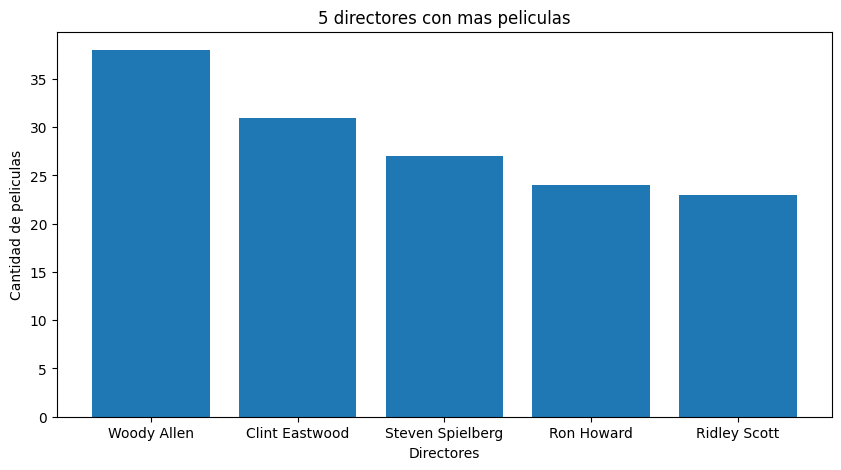

In [9]:
data = df[['name','director']].groupby('director').count()
maxDirectors = data['name'].nlargest(5)

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(maxDirectors.index, maxDirectors.values)
ax.set_title('5 directores con mas peliculas')
ax.set_xlabel('Directores')
ax.set_ylabel('Cantidad de peliculas')

maxDirectors

Los directores que mas peliculas dirigieron fueron Woody Allen(38), Clint Eastwood(31), Steven Spielberg(27), Ron Howard(24) y Riley Scott(23).

### 2. ¿Como fue el desempeño de las peliculas de los 3 directores que mas peliculas dirigieron?

<ipython-input-10-ba3a47af41c0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dir = dir.append([dir1, dir2, dir3], ignore_index=True)


Text(0.5, 1.0, 'Desempeño del director')

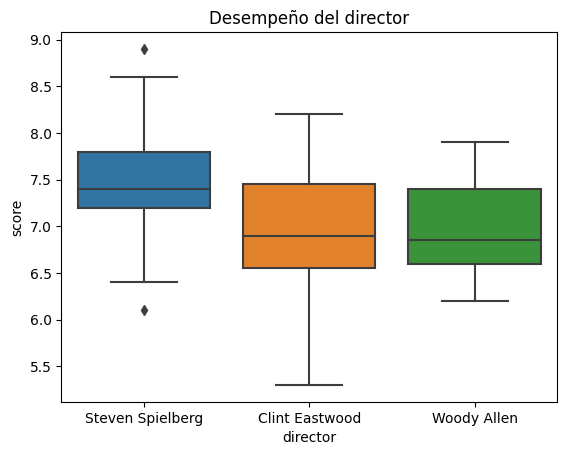

In [10]:
bestDir = (df[['name','director']].groupby(by='director').count())['name'].nlargest(3)
dir = pd.DataFrame(columns=df.columns)
dir1 = df[df.director == bestDir.index[2]]
dir2 = df[df.director == bestDir.index[1]]
dir3 = df[df.director == bestDir.index[0]]

dir = dir.append([dir1, dir2, dir3], ignore_index=True)

sns.boxplot(x='director', y='score', data=dir)
plt.title("Desempeño del director")

De estos, el que mayor desempeño tuvo segun las criticas fue Steven Spielverg.

### 3. ¿Cual es el genero mejor valorado de los mejores actores?

<ipython-input-11-d25aae8c936e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actors = actors.append([act1, act2, act3], ignore_index=True)


Text(0.5, 1.0, 'Valoracion por genero de las peliculas de los mejores actores')

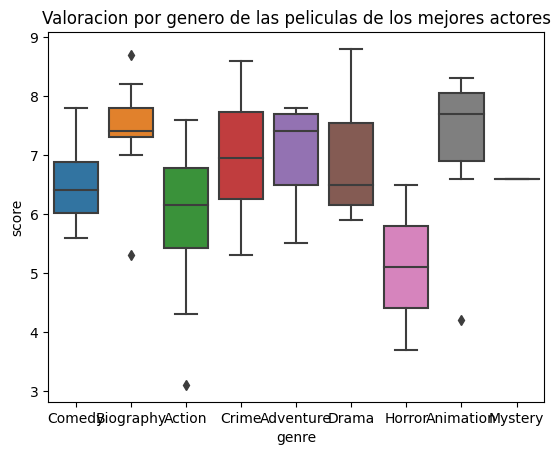

In [11]:
bestStar = (df[['name','star']].groupby(by='star').count())['name'].nlargest(3)
actors = pd.DataFrame(columns=df.columns)
act1 = df[df.star == 'Nicolas Cage']
act2 = df[df.star == 'Robert De Niro']
act3 = df[df.star == 'Tom Hanks']
actors = actors.append([act1, act2, act3], ignore_index=True)

sns.boxplot(x='genre', y='score', data=actors)
plt.title("Valoracion por genero de las peliculas de los mejores actores")

In [12]:
df1 = df['genre'] == 'Animation'
df2 = df[df1].sort_values('score', ascending = False)
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3849,Spirited Away,PG,Animation,2001,"March 28, 2003 (United States)",8.6,679000.0,Hayao Miyazaki,Hayao Miyazaki,Daveigh Chase,Japan,1.900000e+07,3.554752e+08,Tokuma Shoten,125.0
2448,The Lion King,G,Animation,1994,"June 24, 1994 (United States)",8.5,970000.0,Roger Allers,Irene Mecchi,Matthew Broderick,United States,4.500000e+07,1.083721e+09,Walt Disney Pictures,88.0
5260,WALL·E,G,Animation,2008,"June 27, 2008 (United States)",8.4,1000000.0,Andrew Stanton,Andrew Stanton,Ben Burtt,United States,1.800000e+08,5.213119e+08,FortyFour Studios,98.0
7252,Spider-Man: Into the Spider-Verse,PG,Animation,2018,"December 14, 2018 (United States)",8.4,411000.0,Bob Persichetti,Phil Lord,Shameik Moore,United States,9.000000e+07,3.755408e+08,Sony Pictures Entertainment (SPE),117.0
6871,Your Name.,TV-PG,Animation,2016,"April 7, 2017 (United States)",8.4,215000.0,Makoto Shinkai,Makoto Shinkai,Ryûnosuke Kamiki,Japan,3.562223e+07,3.581801e+08,Amuse,106.0


In [13]:
df1 = df['genre'] == 'Drama'
df2 = df[df1].sort_values('score', ascending = False)
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,28817291.0,Castle Rock Entertainment,142.0
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000.0,678226133.0,Paramount Pictures,142.0
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000.0,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,63000000.0,101209702.0,Fox 2000 Pictures,139.0
3244,Saving Private Ryan,R,Drama,1998,"July 24, 1998 (United States)",8.6,1300000.0,Steven Spielberg,Robert Rodat,Tom Hanks,United States,70000000.0,482349603.0,Dreamworks Pictures,169.0
4846,The Prestige,PG-13,Drama,2006,"October 20, 2006 (United States)",8.5,1200000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United Kingdom,40000000.0,109676311.0,Touchstone Pictures,130.0


En cuanto a los generos destacados, el que tuvo mayor regularidad durante estos años fue el de Animacion, siendo el genero Drama el que obtuvo mayores valoraciones. Por otra parte, el menos destacado fue el de Terror, debido posiblemente a los guiones y poco presupuesto. Entre los grandes exitos de la animacion se encuentran 'Spirited Away', 'The Lion King' y 'WALL-E'. En el genero Drama el top lo integran 'Fight Club', 'Forrest Gump' y 'The Shawnshank Redemption', que es la pelicula con mejor critica en IMDB.

### 4. ¿Cual fue el mejor año del cine? ¿Evoluciono favorablemente?

Text(0, 0.5, 'Score')

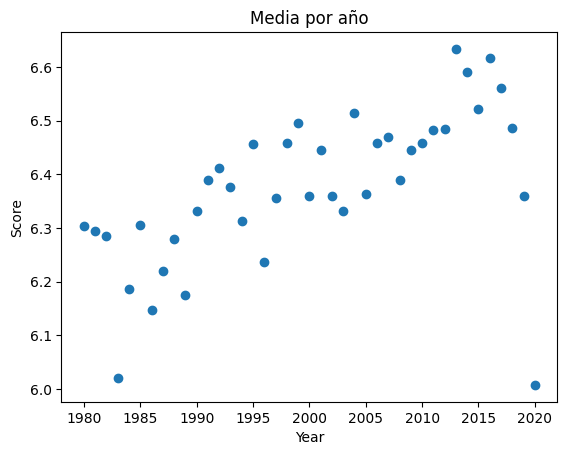

In [14]:
dis = (df[['year','score']]).groupby('year').mean()
plt.scatter(dis.index,dis.values)
plt.title("Media por año");
plt.xlabel("Year")
plt.ylabel("Score")

El año con mejor media de calificacion es 2013. Sin embargo, la diferencia entre las calificaciones de los años no es sustancial, y hay años como 2016 que obtienen casi la misma media.

De 1980 a 2020 se puede ver que hubo, exceptuando algunos años como 1996, una evolución favorable en la media de las calificaciones por año. Sin embargo, en los ultimos años registrados por el dataset, se puede observar una clara involucion de esa media.

In [31]:
df1 = (df['year'] == 2016)
df2 = df[df1].sort_values('score', ascending = False)
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6871,Your Name.,TV-PG,Animation,2016,"April 7, 2017 (United States)",8.4,215000.0,Makoto Shinkai,Makoto Shinkai,Ryûnosuke Kamiki,Japan,3.562223e+07,358180115.0,Amuse,106.0
6917,Dangal,Not Rated,Action,2016,"December 21, 2016 (United States)",8.4,167000.0,Nitesh Tiwari,Piyush Gupta,Aamir Khan,India,3.562223e+07,303723636.0,Aamir Khan Productions,161.0
6865,Hacksaw Ridge,R,Biography,2016,"November 4, 2016 (United States)",8.1,457000.0,Mel Gibson,Robert Schenkkan,Andrew Garfield,Australia,4.000000e+07,180563636.0,Summit Entertainment,139.0
6866,The Handmaiden,Not Rated,Drama,2016,"June 1, 2016 (South Korea)",8.1,123000.0,Park Chan-Wook,Sarah Waters,Kim Min-hee,South Korea,3.562223e+07,37767206.0,CJ Entertainment,145.0
7031,Pink,Not Rated,Crime,2016,"September 16, 2016 (United States)",8.1,41000.0,Aniruddha Roy Chowdhury,Shoojit Sircar,Taapsee Pannu,India,3.562223e+07,180180.0,NH Studioz,136.0


In [32]:
df1 = (df['year'] == 1999)
df2 = df[df1].sort_values('score', ascending = False)
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000.0,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,6.300000e+07,101209702.0,Fox 2000 Pictures,139.0
3443,The Matrix,R,Action,1999,"March 31, 1999 (United States)",8.7,1700000.0,Lana Wachowski,Lilly Wachowski,Keanu Reeves,United States,6.300000e+07,466364845.0,Warner Bros.,136.0
3449,The Green Mile,R,Crime,1999,"December 10, 1999 (United States)",8.6,1200000.0,Frank Darabont,Stephen King,Tom Hanks,United States,6.000000e+07,286801374.0,Castle Rock Entertainment,189.0
3450,American Beauty,R,Drama,1999,"October 1, 1999 (United States)",8.3,1100000.0,Sam Mendes,Alan Ball,Kevin Spacey,United States,1.500000e+07,356296601.0,Dreamworks Pictures,122.0
3626,The Color of Paradise,PG,Drama,1999,"September 7, 2000 (Australia)",8.2,16000.0,Majid Majidi,Majid Majidi,Hossein Mahjoub,Iran,3.562223e+07,2777552.0,Varahonar Company,90.0


In [33]:
df1 = (df['year'] == 1994)
df2 = df[df1].sort_values('score', ascending = False)
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,2.500000e+07,2.881729e+07,Castle Rock Entertainment,142.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8.000000e+06,2.139288e+08,Miramax,154.0
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,5.500000e+07,6.782261e+08,Paramount Pictures,142.0
2446,Léon: The Professional,R,Action,1994,"November 18, 1994 (United States)",8.5,1100000.0,Luc Besson,Luc Besson,Jean Reno,France,3.562223e+07,1.955264e+07,Gaumont,110.0
2448,The Lion King,G,Animation,1994,"June 24, 1994 (United States)",8.5,970000.0,Roger Allers,Irene Mecchi,Matthew Broderick,United States,4.500000e+07,1.083721e+09,Walt Disney Pictures,88.0


Lo que se busca enseñar con estos ultimos cuadros es que si bien el año con mejor media de clasificacion fue 2013, sus calificaciones no fueron importantes en comparacion con calificaciones de peliculas de las decada del '90. La mejor calificacion en 2013 la recibió con 8.2 'The Wolf of Wall Street'. En cambio las mejores peliculas de las decadas pasadas obtienen puntuaciones superiores a los 8.7 como 'The shawnshank redemption', 'Fight Club', 'Matrix', 'Pulp Fiction'.

Un dato a tener en cuenta tambien es que 'The Wolf of Wall Street' es dirigida por Martin Scorsese, uno de los directores mas destacados del siglo pasado.

# Machine Learning

In [15]:
delete_colums=['name','released','company','rating','country','writer','director', 'star']
df_limpio=df.drop(columns=delete_colums)

df_limpio['score'].fillna(df['score'].mean(), inplace=True)
df_limpio['votes'].fillna(df['votes'].mean(), inplace=True)
df_limpio['runtime'].fillna(df['runtime'].mean(), inplace=True)
df_limpio['budget'].fillna(df['budget'].mean(), inplace=True)
df_limpio['gross'].fillna(df['gross'].mean(), inplace=True)

one_hot_encoded = pd.get_dummies(df_limpio[['genre']], dtype=int, dummy_na=False)
df_limpio.drop(['genre'], axis=1, inplace=True)
df_limpio = pd.concat([df_limpio, one_hot_encoded], axis=1)

df_limpio.head()

,year,score,votes,budget,gross,runtime,genre_Action,genre_Adventure,genre_Animation,genre_Biography,...,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_Western
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1980,7.7,221000.0,3500000.0,83453539.0,88.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1980,7.3,108000.0,6000000.0,39846344.0,98.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_limpio.isnull().sum().sum()

0

In [17]:
X = df_limpio.drop('score', axis=1)
y = df_limpio['score']

In [18]:
X

,year,votes,budget,gross,runtime,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,...,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_Western
0,1980,9.270000e+05,1.900000e+07,4.699877e+07,146.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1980,6.500000e+04,4.500000e+06,5.885311e+07,104.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1980,1.200000e+06,1.800000e+07,5.383751e+08,124.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1980,2.210000e+05,3.500000e+06,8.345354e+07,88.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1980,1.080000e+05,6.000000e+06,3.984634e+07,98.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,2020,1.800000e+01,7.000000e+03,7.856527e+07,90.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7664,2020,3.600000e+01,3.562223e+07,7.856527e+07,90.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7665,2020,2.900000e+01,5.875000e+04,7.856527e+07,107.293871,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7666,2020,8.824582e+04,1.500000e+04,7.856527e+07,120.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y

0       8.400000
1       5.800000
2       8.700000
3       7.700000
4       7.300000
          ...   
7663    3.100000
7664    4.700000
7665    5.700000
7666    6.389853
7667    5.700000
Name: score, Length: 7640, dtype: float64

In [20]:
import statsmodels.api as sm
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

**Backward elimination**

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7640 entries, 0 to 7667
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             7640 non-null   int64  
 1   votes            7640 non-null   float64
 2   budget           7640 non-null   float64
 3   gross            7640 non-null   float64
 4   runtime          7640 non-null   float64
 5   genre_Action     7640 non-null   int64  
 6   genre_Adventure  7640 non-null   int64  
 7   genre_Animation  7640 non-null   int64  
 8   genre_Biography  7640 non-null   int64  
 9   genre_Comedy     7640 non-null   int64  
 10  genre_Crime      7640 non-null   int64  
 11  genre_Drama      7640 non-null   int64  
 12  genre_Family     7640 non-null   int64  
 13  genre_Fantasy    7640 non-null   int64  
 14  genre_History    7640 non-null   int64  
 15  genre_Horror     7640 non-null   int64  
 16  genre_Music      7640 non-null   int64  
 17  genre_Musical 

In [22]:
backward_elimination(X,y)

['votes',
 'budget',
 'runtime',
 'genre_Action',
 'genre_Animation',
 'genre_Biography',
 'genre_Crime',
 'genre_Drama',
 'genre_History',
 'genre_Horror',
 'genre_Musical']

**Algoritmo de regresión**

In [23]:
import numpy as np
import pandas as pd
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 0.5662798526239957


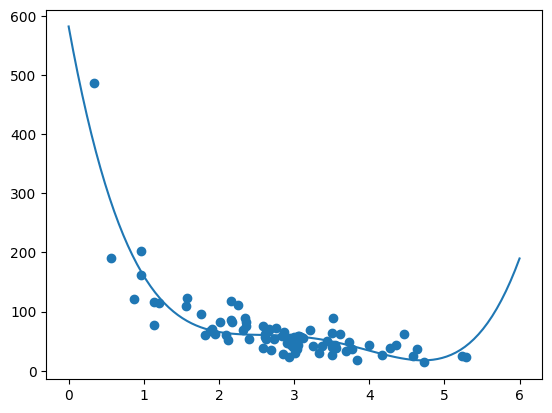

In [24]:
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

myline = np.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

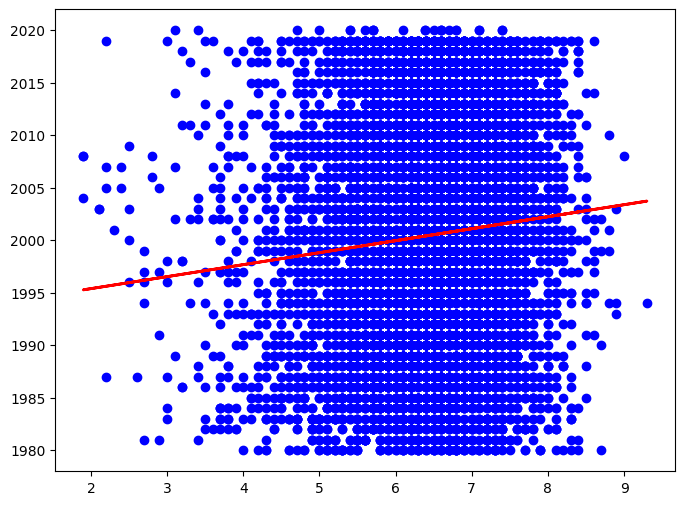

In [25]:
from sklearn.linear_model import LinearRegression

X = df_limpio[['score']]
y = df_limpio['year']

modelo_regresion = LinearRegression()
modelo_regresion.fit(X, y)
y_pred = modelo_regresion.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos originales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.show()

**Matriz de confusión**

In [27]:
actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)

In [28]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

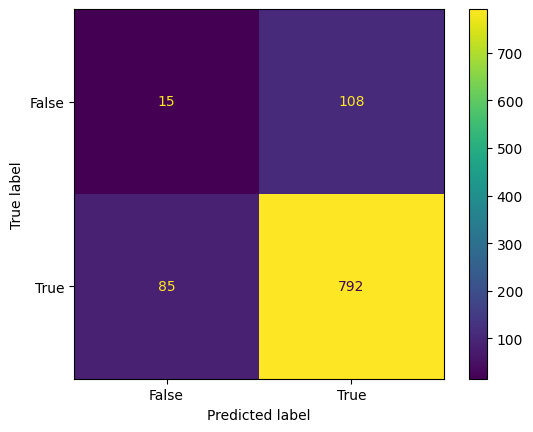

In [29]:
cm_display.plot()
plt.show()

In [30]:
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)
print({"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Precision': 0.88, 'Sensitivity_recall': 0.9030786773090079, 'Specificity': 0.12195121951219512, 'F1_score': 0.891389983117614}


# Insights

Text(0, 0.5, 'Cantidad de peliculas')

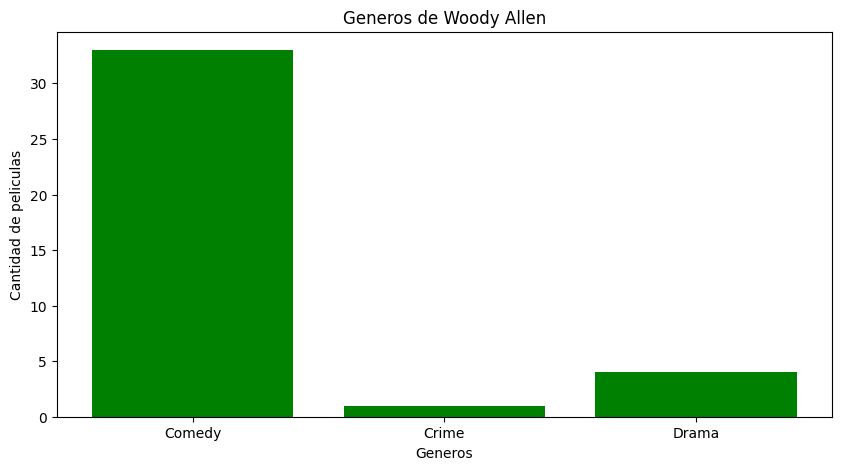

In [56]:
wa = df['director'] == 'Woody Allen'
wa = df[wa].sort_values('score', ascending = False)
wa = wa[['name','genre']].groupby('genre').count()

wa1 = wa['name']

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(wa1.index, wa1.values, color='green')
ax.set_title('Generos de Woody Allen')
ax.set_xlabel('Generos')
ax.set_ylabel('Cantidad de peliculas')

Text(0, 0.5, 'Cantidad de peliculas')

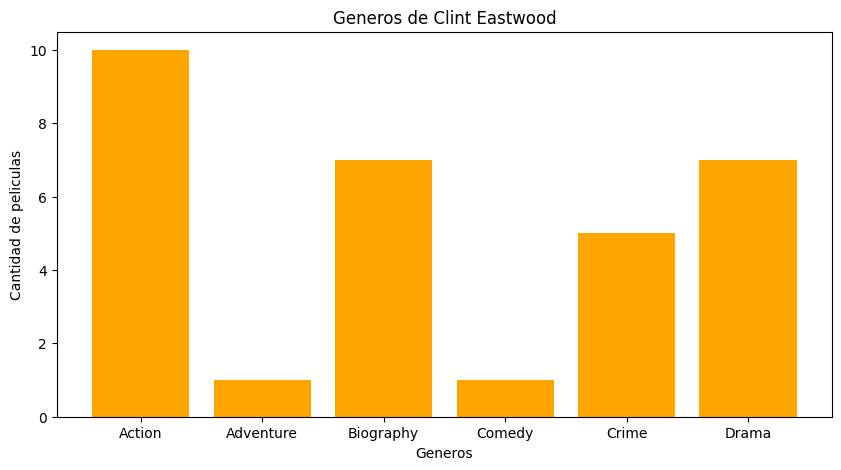

In [57]:
ce = df['director'] == 'Clint Eastwood'
ce = df[ce].sort_values('score', ascending = False)
ce = ce[['name','genre']].groupby('genre').count()

ce1 = ce['name']

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(ce1.index, ce1.values, color='orange')
ax.set_title('Generos de Clint Eastwood')
ax.set_xlabel('Generos')
ax.set_ylabel('Cantidad de peliculas')

Text(0, 0.5, 'Cantidad de peliculas')

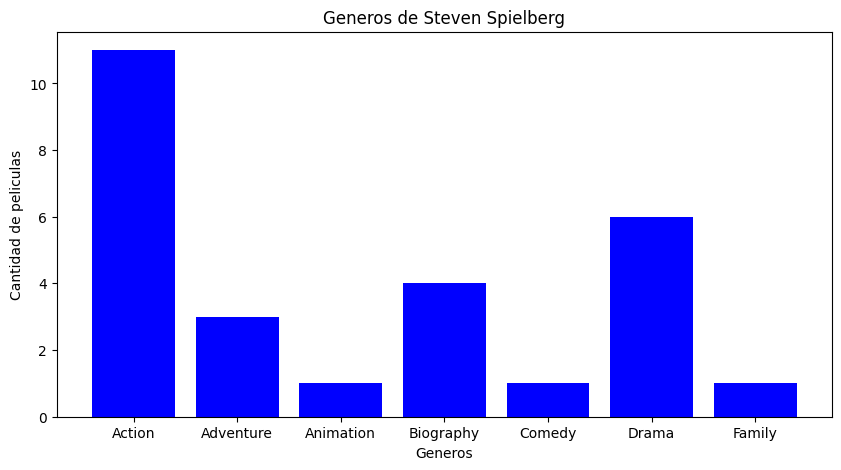

In [58]:
sp = df['director'] == 'Steven Spielberg'
sp = df[sp].sort_values('score', ascending = False)
sp = sp[['name','genre']].groupby('genre').count()

sp1 = sp['name']

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(sp1.index, sp1.values, color='blue')
ax.set_title('Generos de Steven Spielberg')
ax.set_xlabel('Generos')
ax.set_ylabel('Cantidad de peliculas')

Si bien anteriormente llegamos a la conclusión que Steven Spielberg sobresale que mas que Woody Allen y Clint Eastwood, tanto en la puntuación como en el reconomiento a lo largo de los años de sus peliculas, podemos observar que cada uno destaca en un genero diferente. Woody Allen es experto en las peliculas de Comedia. Clint Eastwood es un gran director en las peliculas de Accion. Y si bien Steven Spielberg dirigió mas peliculas de Acción, sus mayores exitos se encuentran dentro del genero Biograficos y Dramas.



In [41]:
#lista_genero = df['genre'].unique().tolist()

#lista_numerica=[]

#for i in range(0,len(lista_genero)):
#    lista_numerica.append(i)